In [1]:
import cv2
import numpy as np
import pytesseract
from PIL import Image
from IPython.display import display

# set tesseract path
pytesseract.pytesseract.tesseract_cmd = r"C:\Program Files\Tesseract-OCR\tesseract.exe"

In [2]:
FILE_1 = "./data/test/ocr/ocr-1.png"
FILE_2 = "./data/test/ocr/ocr-2.png"

Tesseract Page Segmentation Modes (PSMs):
- 3    Fully automatic page segmentation, but no OSD. (Default)  
- 6    Assume a single uniform block of text.  
- 7    Treat the image as a single text line.  

In [3]:
def ocr_pil_no_crop(input_file, psm=3):
  img = Image.open(input_file)

  print(f"Image size (W x H): {img.size[0]} x {img.size[1]}")
  display(img)

  text = pytesseract.image_to_string(
      img,
      lang="eng",
      config=f"--psm {psm}"
  )

  print("===== OCR TEXT =====")
  print(text)

Image size (W x H): 900 x 600


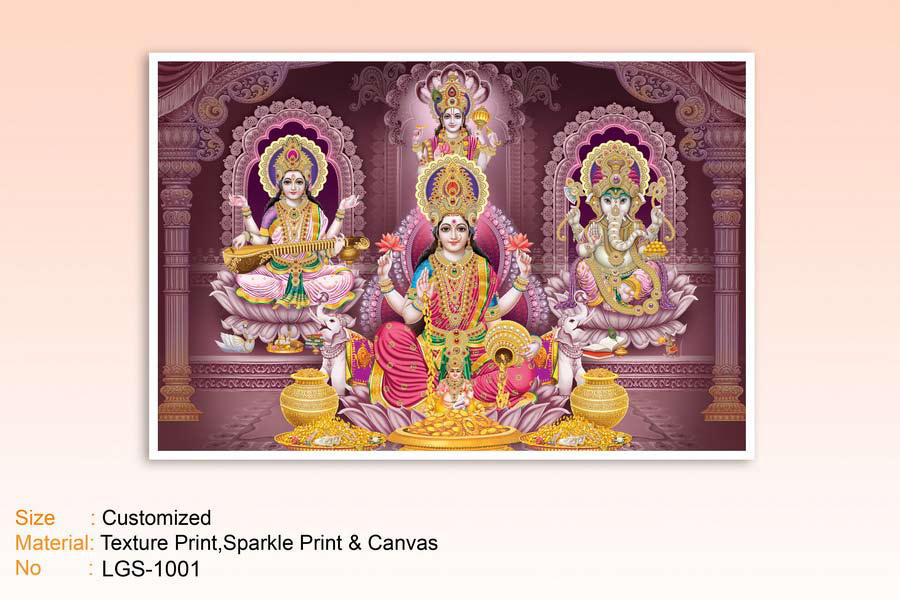

===== OCR TEXT =====
Customized
Texture Print,Sparkle Print & Canvas
LGS-1001



In [4]:
ocr_pil_no_crop(FILE_1, psm=3)

Image size (W x H): 500 x 353


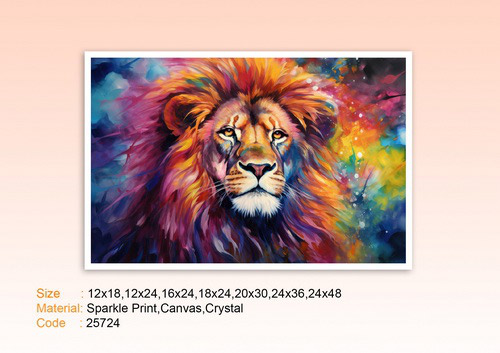

===== OCR TEXT =====
12x18 12x24, 16x24, 18X24, 20x30,24x36,24x48
‘Sparkle Print Canvas Crystal
2724



In [5]:
ocr_pil_no_crop(FILE_2, psm=3)

In [7]:
def ocr_pil_with_crop(input_file, crop_coords, psm=7):
  img = Image.open(input_file)

  print(f"Original image size (W x H): {img.size[0]} x {img.size[1]}")

  (y1, y2), (x1, x2) = crop_coords
  crop = img.crop((x1, y1, x2, y2))

  print(f"Crop size (W x H): {crop.size[0]} x {crop.size[1]}")
  display(crop)

  text = pytesseract.image_to_string(
      crop,
      lang="eng",
      config=f"--psm {psm}"
  )

  print("===== OCR TEXT =====")
  print(text)

In [11]:
ocr_pil_with_crop(
    FILE_1,
    crop_coords=[(555, 585), (95, 240)],
)

Original image size (W x H): 900 x 600
Crop size (W x H): 145 x 30


===== OCR TEXT =====
LGS-1001



In [12]:
ocr_pil_with_crop(
    FILE_2,
    crop_coords=[(315, 332), (80, 130)],
)

Original image size (W x H): 500 x 353
Crop size (W x H): 50 x 17


===== OCR TEXT =====
25724



In [ ]:
def ocr_cv_threshold(input_file, thresh=220, psm=3):
  img = cv2.imread(input_file)

  if img is None:
    raise FileNotFoundError(input_file)

  gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

  _, th = cv2.threshold(gray, thresh, 255, cv2.THRESH_BINARY)

  display(Image.fromarray(th))

  text = pytesseract.image_to_string(
      th,
      lang="eng",
      config=f"--psm {psm}"
  )

  print("===== OCR TEXT =====")
  print(text)

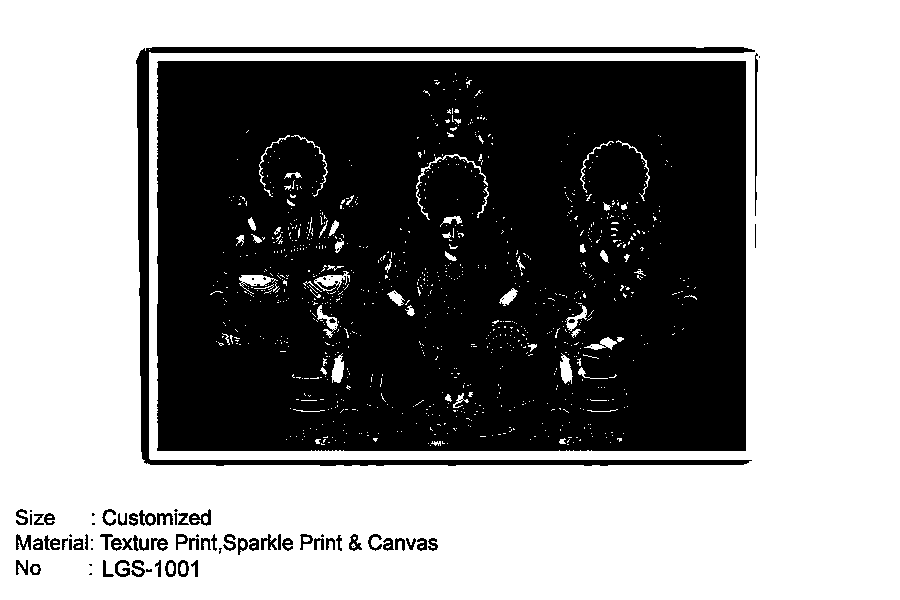

===== OCR TEXT =====
Size: Customized
Material: Texture Print,Sparkle Print & Canvas
No > LGS-1001



In [15]:
ocr_cv_threshold(FILE_1, thresh=220)

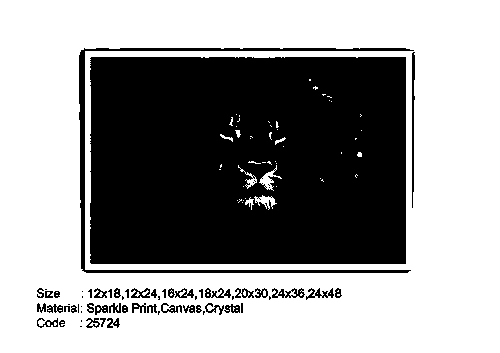

===== OCR TEXT =====
Size: 1x18 1224, 16x24, 18x24,20%90, 24x36, 24x48
Material; Sparkle Print, Canvas, Crystal
Code: 26724



In [16]:
ocr_cv_threshold(FILE_2, thresh=220)